In [1]:
# issue: plot_MNIST_hyperplanes.py doesnt have the right directions
# test on img1 to img2 plot

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
import numpy as np
import torch
from torch import optim
import copy

In [5]:
# custom library imports
import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [6]:
# check gpus
!gpustat

crescent                Thu Jul 30 23:15:14 2020  418.87.01
[0] GeForce RTX 2080 Ti | 53'C,   0 % |    10 / 10989 MB |
[1] GeForce RTX 2080 Ti | 52'C,   0 % |  5247 / 10989 MB | felix(5237M)


In [7]:
# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print("Using device:", device)

# manualy set cuda device
torch.cuda.set_device(0)

CUDA Available:  True
Using device: cuda


In [8]:
# get data 
(mnist_train_loader, mnist_val_loader, mnist_test_loader) = fgnh.mnist_dataloaders(batch_size=10000, 
                                                                                   batch_size_for_val=10000)

In [9]:
# load classic model
classic_model_path = "../Experiments/sample_models/sample_classic_full.pth"
classic_model = torch.load(classic_model_path)
classic_model.to(device)

Feedforward_Classic_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Linear(in_features=64, out_features=10, bias=True)
)

# Space between classes

In [10]:
img1 = mnist_val_loader.dataset.tensors[0][0]
img2 = mnist_val_loader.dataset.tensors[0][2]

loss_func = torch.nn.CrossEntropyLoss()
grid_size = 200

In [11]:
mnist_val_loader.dataset.tensors[1][0:10]

tensor([3, 8, 6, 9, 6, 4, 5, 3, 8, 4])

<IPython.core.display.Javascript object>


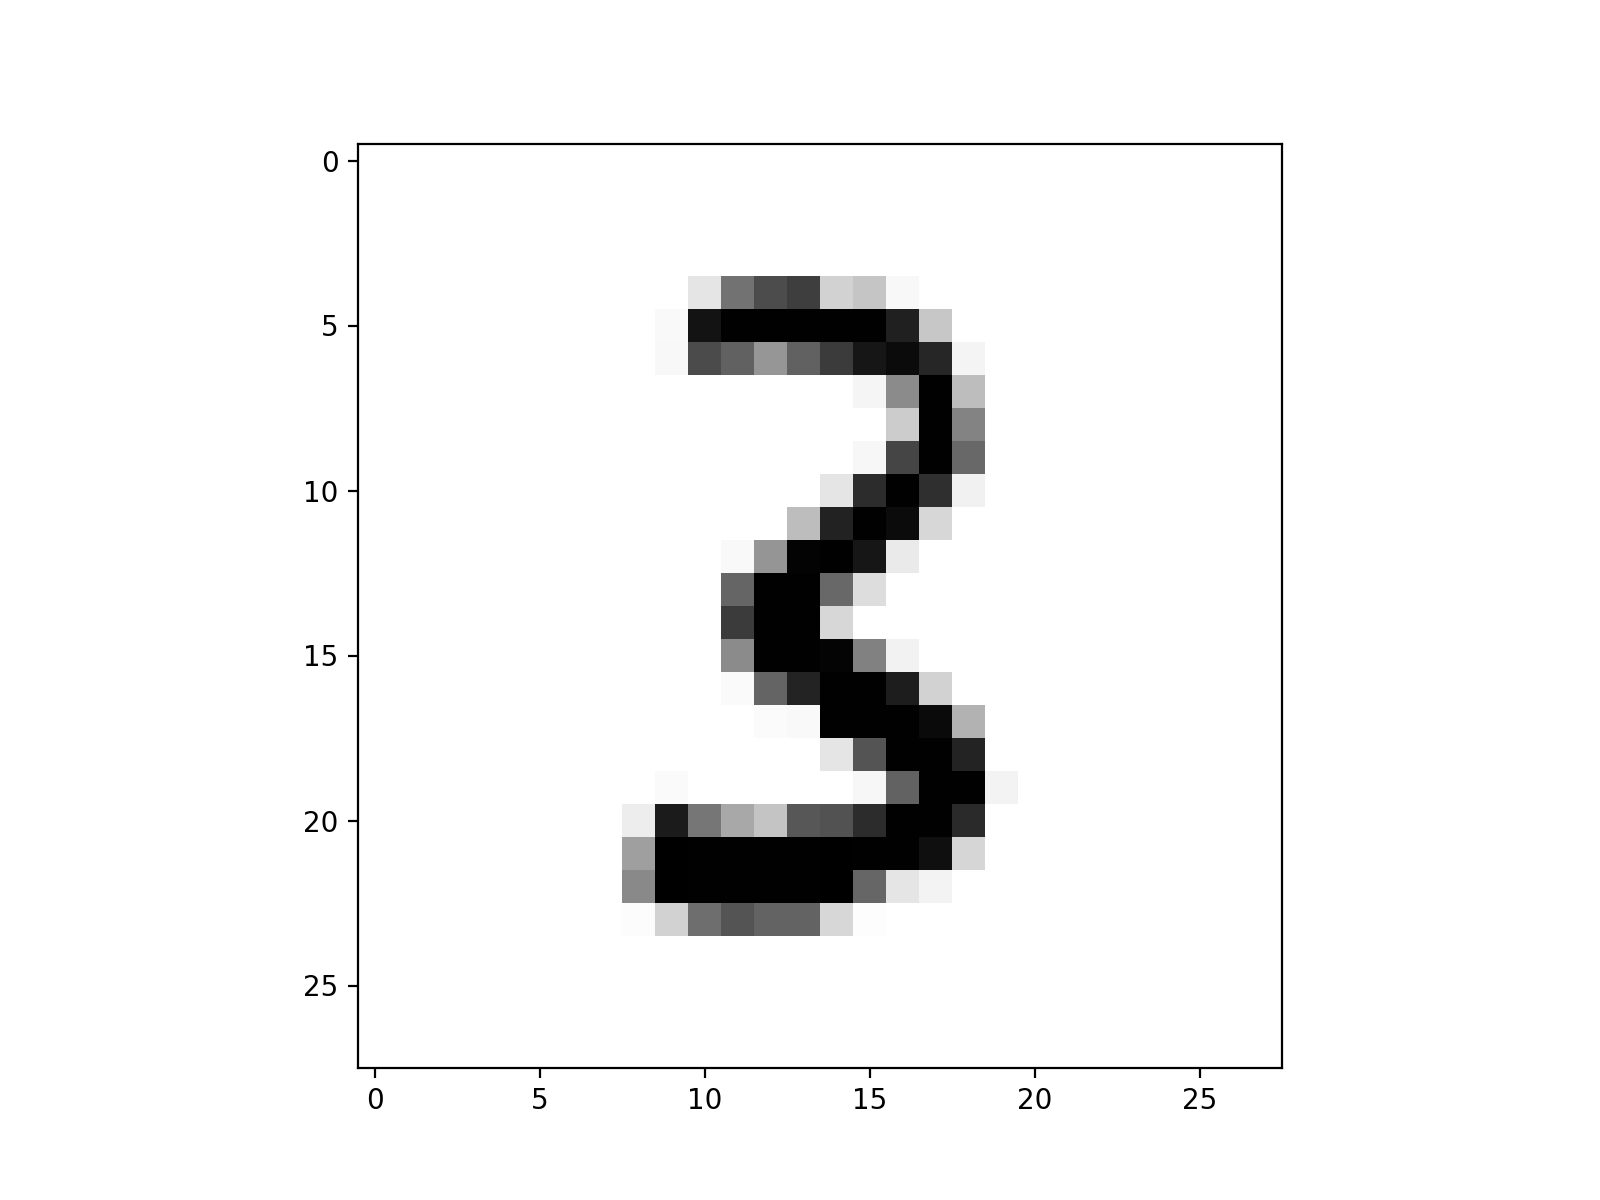

<IPython.core.display.Javascript object>


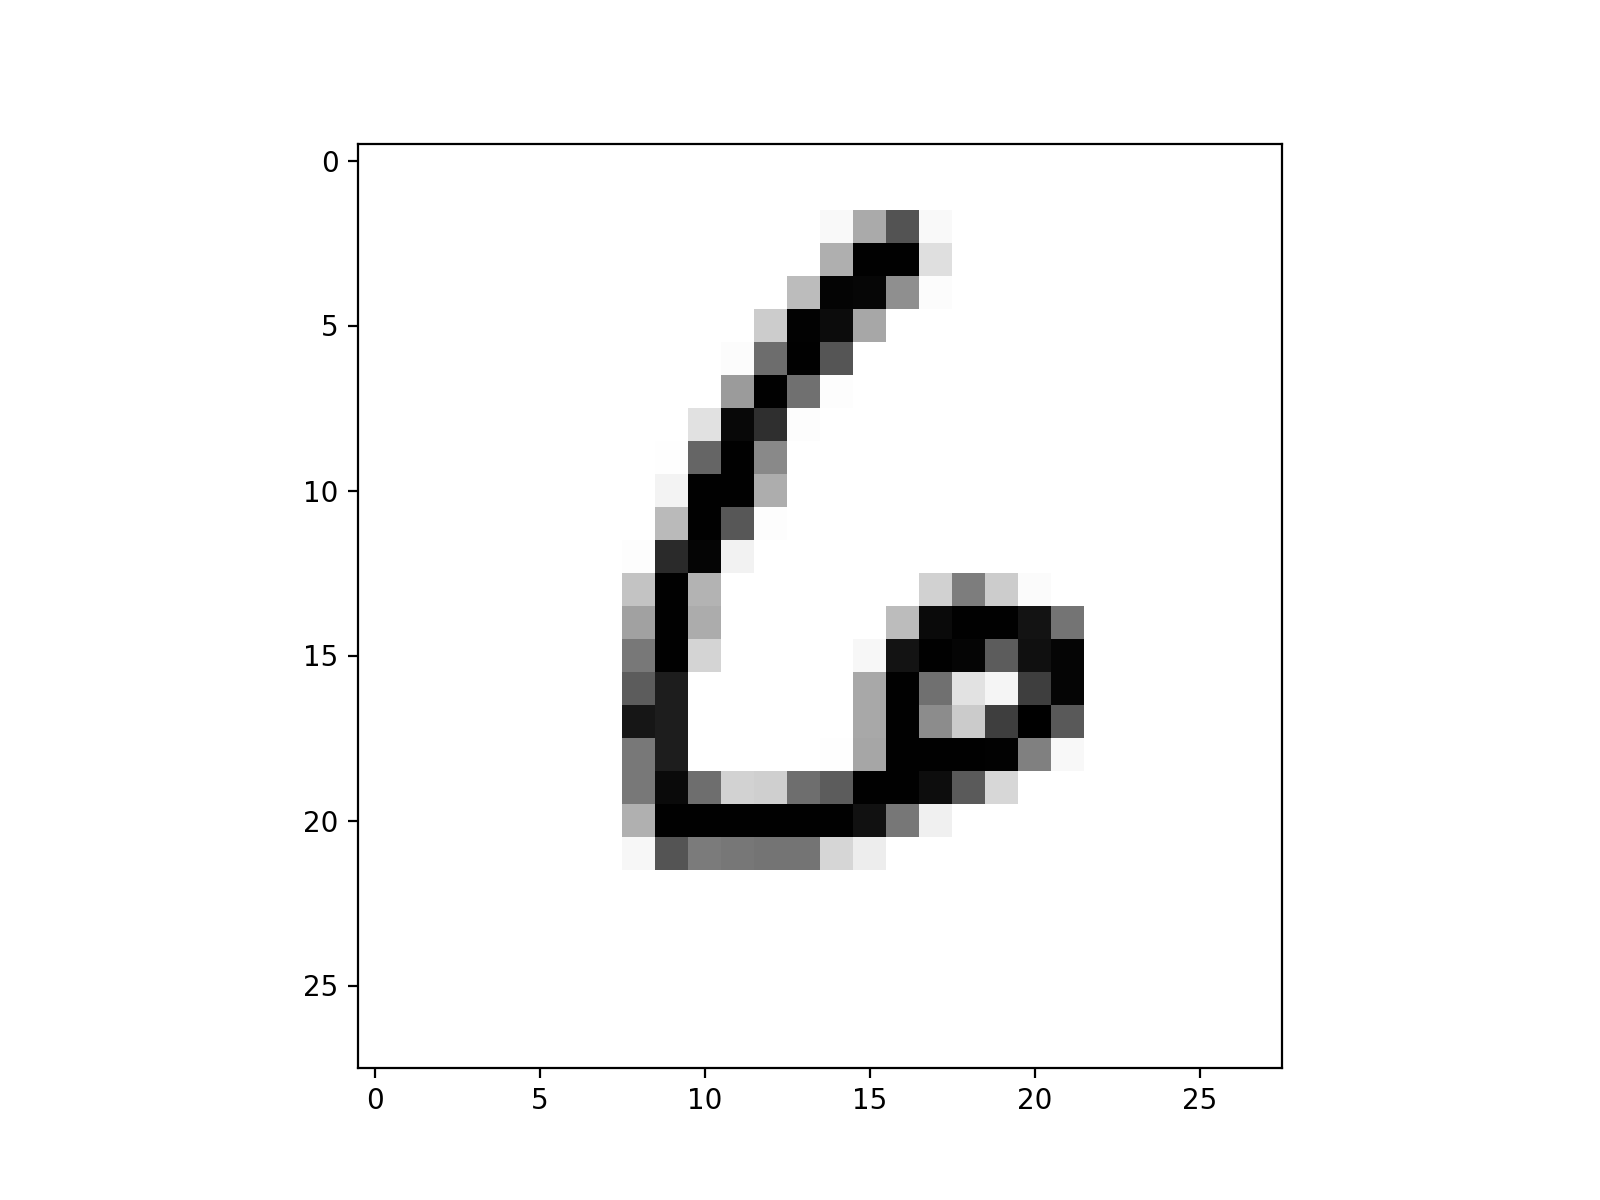

In [12]:
plt.imshow(img1, cmap='Greys')
plt.show()
plt.imshow(img2, cmap='Greys')
plt.show()

In [13]:
# check model prediction
torch.max(classic_model(img1.to(device)), dim=1, keepdim=False)

torch.return_types.max(
values=tensor([12.9632], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3], device='cuda:0'))

In [14]:
torch.max(classic_model(img2.to(device)), dim=1, keepdim=False)

torch.return_types.max(
values=tensor([10.4897], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([6], device='cuda:0'))

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# from .categorical_cmap import categorical_cmap
# from .get_rand_orthogonal_set import get_rand_orthogonal_set

from Finite_Gaussian_Network_lib.fgn_helper_lib import categorical_cmap
from Finite_Gaussian_Network_lib.fgn_helper_lib import get_rand_orthogonal_set

In [16]:
# given an MNIST model, a start and end point in the MNIST hyperspace (ie images)
# plots a grid of heatmaps of the model along hyperplanes that contain (end-start) vector 

# pre-requisites
# colors = c10
c10 =  categorical_cmap(10, 9, cmap='tab10', reverse=True, continuous=False)
n_plots = 1

In [17]:
model = classic_model
# set model in eval mode
model.eval()    

Feedforward_Classic_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Linear(in_features=64, out_features=10, bias=True)
)

In [18]:
# vector-tensor from start to end
start = img1
end = img2
v0 = end-start

In [19]:
# set of orthogonal vectors to v0, 
Vs = get_rand_orthogonal_set(v0, mode='canonical')

In [20]:
# check orthogonal
[v0.numpy().flatten().dot(v.numpy().flatten()) for v in Vs]

[973.37177,
 0.00012363351,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00012363351,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.00012363351,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.552317e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.7706725e-11,
 0.0,
 0.0,
 0.0,
 0.0,
 5.684342e-13,
 -7.1525574e-07,
 -3.8146973e-06,
 1.9073486e-05,
 -9.536743e-07,
 -7.958079e-12,
 0.0,
 1.3187673e-11,
 0.0,
 1.364242e-12,
 -8.094503e-11,
 -1.0004442e-11,
 -1.1823431e-11,
 -1.0004442e-11,
 -1.1823431e-11,
 -2.0918378e-11,
 -2.046363e-11,
 -1.0913936e-11,
 -1.0913936e-11,
 -2.0918378e-11,
 -2.046363e-11,
 -1.0004442e-11,
 -8.185452e-12,
 -2.910383e-11,
 -1.7735147e-11,
 -8.185452e-12,
 -1.364242e-12,
 5.456968e-12,
 -4.9112714e-11,
 -9.536743e-06,
 5.340576e-05,
 -6.1035156e-05,
 -3.8146973e-06,
 0.0,

In [21]:
# check norm
[v0.norm() - v.norm() for v in Vs]

[tensor(0.),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(0.),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(3.8147e-06),
 tensor(0.),
 tensor(-3.8147e

In [22]:
# define the XY grid
# if gridsize is even, add 1 to ensure we pass by (0,0)
# if grid_size%2==0: grid_size+=1

factor = 1

# X is v0 axis
X = np.linspace(0, 1, grid_size)
# Y is orthogonal to v0
Y = np.linspace(-0.5/factor, 0.5/factor, grid_size)
Xs, Ys = np.meshgrid(X,Y)
# cartestian product
XYs = np.array(list(zip(Xs.ravel(), Ys.ravel())))

In [23]:
X

array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.37185

In [24]:
Y

array([-0.5       , -0.49497487, -0.48994975, -0.48492462, -0.4798995 ,
       -0.47487437, -0.46984925, -0.46482412, -0.45979899, -0.45477387,
       -0.44974874, -0.44472362, -0.43969849, -0.43467337, -0.42964824,
       -0.42462312, -0.41959799, -0.41457286, -0.40954774, -0.40452261,
       -0.39949749, -0.39447236, -0.38944724, -0.38442211, -0.37939698,
       -0.37437186, -0.36934673, -0.36432161, -0.35929648, -0.35427136,
       -0.34924623, -0.34422111, -0.33919598, -0.33417085, -0.32914573,
       -0.3241206 , -0.31909548, -0.31407035, -0.30904523, -0.3040201 ,
       -0.29899497, -0.29396985, -0.28894472, -0.2839196 , -0.27889447,
       -0.27386935, -0.26884422, -0.2638191 , -0.25879397, -0.25376884,
       -0.24874372, -0.24371859, -0.23869347, -0.23366834, -0.22864322,
       -0.22361809, -0.21859296, -0.21356784, -0.20854271, -0.20351759,
       -0.19849246, -0.19346734, -0.18844221, -0.18341709, -0.17839196,
       -0.17336683, -0.16834171, -0.16331658, -0.15829146, -0.15

In [25]:
XYs

array([[ 0.        , -0.5       ],
       [ 0.00502513, -0.5       ],
       [ 0.01005025, -0.5       ],
       ...,
       [ 0.98994975,  0.5       ],
       [ 0.99497487,  0.5       ],
       [ 1.        ,  0.5       ]])

In [26]:
# random orth
ortho = Vs[np.random.choice(len(Vs)-1)+1]

# new inputs
inputs_list = [start + x_step*v0 + y_step*ortho for x_step, y_step in XYs]
inputs = torch.stack(inputs_list)

In [27]:
torch.sum(v0-(img2-img1))

tensor(0.)

In [28]:
# XYs[55]

In [29]:
# XYs[65]

In [30]:
# torch.sum(inputs[65]-img2)

In [31]:
# torch.sum(inputs[65]-(img1+v0))

In [32]:
torch.sum(img1+1.0*(img2-img1) - img2)

tensor(5.5879e-09)

In [33]:
Xs.shape

(200, 200)

In [34]:
# check
Zs = np.array([10*x+(y) for x,y in XYs])
to_plot = np.reshape(Zs, Xs.shape)

In [35]:
XYs, Zs

(array([[ 0.        , -0.5       ],
        [ 0.00502513, -0.5       ],
        [ 0.01005025, -0.5       ],
        ...,
        [ 0.98994975,  0.5       ],
        [ 0.99497487,  0.5       ],
        [ 1.        ,  0.5       ]]),
 array([-0.5       , -0.44974874, -0.39949749, ..., 10.39949749,
        10.44974874, 10.5       ]))

In [36]:
to_plot

array([[-0.5       , -0.44974874, -0.39949749, ...,  9.39949749,
         9.44974874,  9.5       ],
       [-0.49497487, -0.44472362, -0.39447236, ...,  9.40452261,
         9.45477387,  9.50502513],
       [-0.48994975, -0.43969849, -0.38944724, ...,  9.40954774,
         9.45979899,  9.51005025],
       ...,
       [ 0.48994975,  0.54020101,  0.59045226, ..., 10.38944724,
        10.43969849, 10.48994975],
       [ 0.49497487,  0.54522613,  0.59547739, ..., 10.39447236,
        10.44472362, 10.49497487],
       [ 0.5       ,  0.55025126,  0.60050251, ..., 10.39949749,
        10.44974874, 10.5       ]])

In [37]:
Xs,Ys

(array([[0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        ...,
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ]]),
 array([[-0.5       , -0.5       , -0.5       , ..., -0.5       ,
         -0.5       , -0.5       ],
        [-0.49497487, -0.49497487, -0.49497487, ..., -0.49497487,
         -0.49497487, -0.49497487],
        [-0.48994975, -0.48994975, -0.48994975, ..., -0.48994975,
         -0.48994975, -0.48994975],
        ...,
        [ 0.48994975,  0.48994975,  0.48994975, ...,  0.48994975,
          0.48994975,  0

In [38]:
Xs[0,0], Ys[0,0], Xs[0,0+1],Ys[0,0+1], Xs[0+1,0],Ys[0+1,0], Xs[0+1,0+1],Ys[0+1,0+1],

(0.0,
 -0.5,
 0.005025125628140704,
 -0.5,
 0.0,
 -0.4949748743718593,
 0.005025125628140704,
 -0.4949748743718593)

<IPython.core.display.Javascript object>


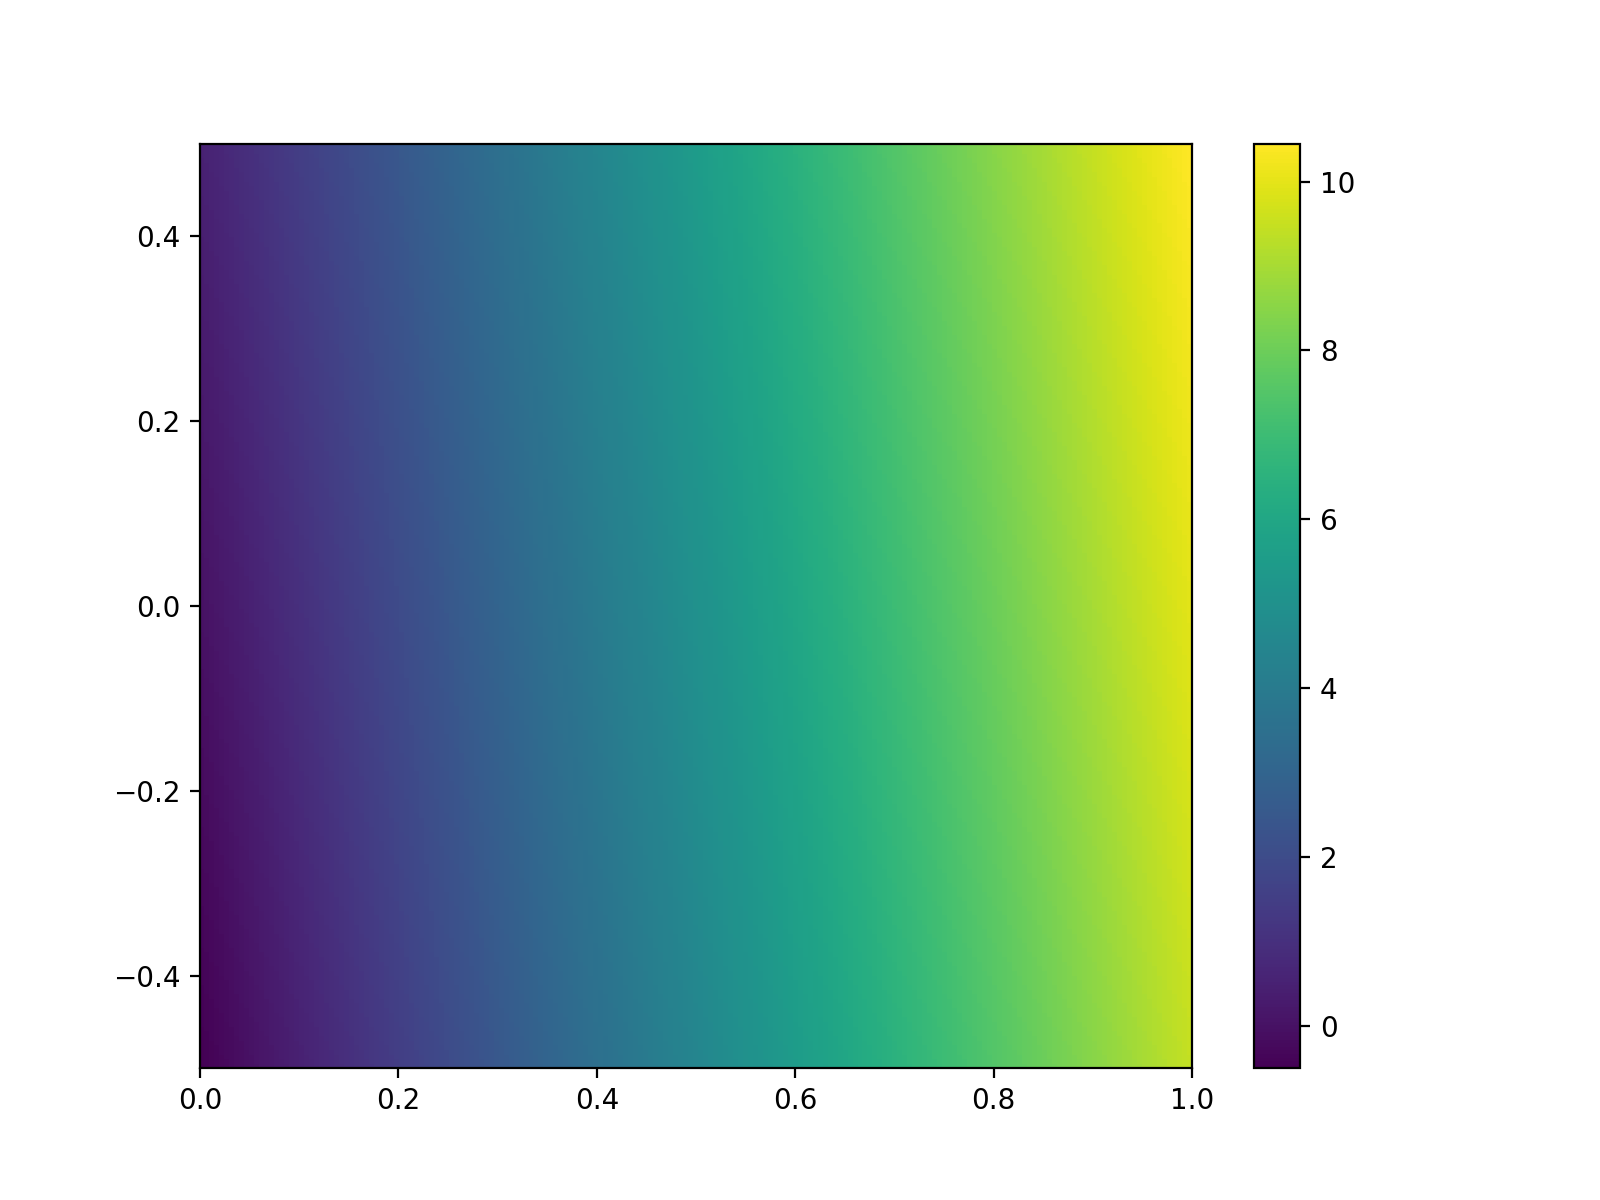

In [39]:
plt.pcolormesh(Xs, Ys, to_plot)
plt.colorbar()
plt.show()

In [40]:
# compute Zs
with torch.no_grad(): heatmap_preds = model(inputs.to(device))

In [41]:
heatmap_preds.shape

torch.Size([40000, 10])

In [42]:
# apply softmax for probs, nans are replaced by 1.0 
heatmap_preds_softmax = np.nan_to_num(np.array([np.exp(x)/sum(np.exp(x)) 
                                                for x in heatmap_preds.cpu().numpy()]), nan=1.0)

In [43]:
heatmap_preds_softmax.shape

(40000, 10)

In [44]:
pred_classes = np.argmax(heatmap_preds_softmax, axis=1)
pred_confidences = np.max(heatmap_preds_softmax, axis=1)

In [45]:
pred_classes

array([8, 8, 8, ..., 7, 7, 7])

In [46]:
pred_confidences

array([0.72611356, 0.72509015, 0.7238388 , ..., 0.681783  , 0.6789533 ,
       0.67616254], dtype=float32)

In [47]:
np.reshape(pred_classes, np.shape(Xs))

array([[8, 8, 8, ..., 2, 2, 2],
       [8, 8, 8, ..., 2, 2, 2],
       [8, 8, 8, ..., 2, 2, 2],
       ...,
       [3, 3, 3, ..., 7, 7, 7],
       [3, 3, 3, ..., 7, 7, 7],
       [3, 3, 3, ..., 7, 7, 7]])

In [48]:
to_plot = [pred_class+0.9*pred_confidence 
           for pred_class, pred_confidence in zip(pred_classes, pred_confidences)]

to_plot = np.reshape(to_plot, np.shape(Xs))

In [49]:
to_plot

array([[8.6535022 , 8.65258113, 8.65145493, ..., 2.56491292, 2.55601227,
        2.54620799],
       [8.64541668, 8.64469882, 8.64379861, ..., 2.53613276, 2.52540585,
        2.51370375],
       [8.63672407, 8.63619434, 8.63550876, ..., 2.50373688, 2.4910702 ,
        2.47740569],
       ...,
       [3.73366544, 3.73323687, 3.73276974, ..., 7.62337922, 7.62081589,
        7.61829494],
       [3.73963737, 3.73880884, 3.73790349, ..., 7.61792361, 7.61536666,
        7.6128493 ],
       [3.74417406, 3.74288414, 3.74147238, ..., 7.61360472, 7.61105796,
        7.60854629]])

<IPython.core.display.Javascript object>


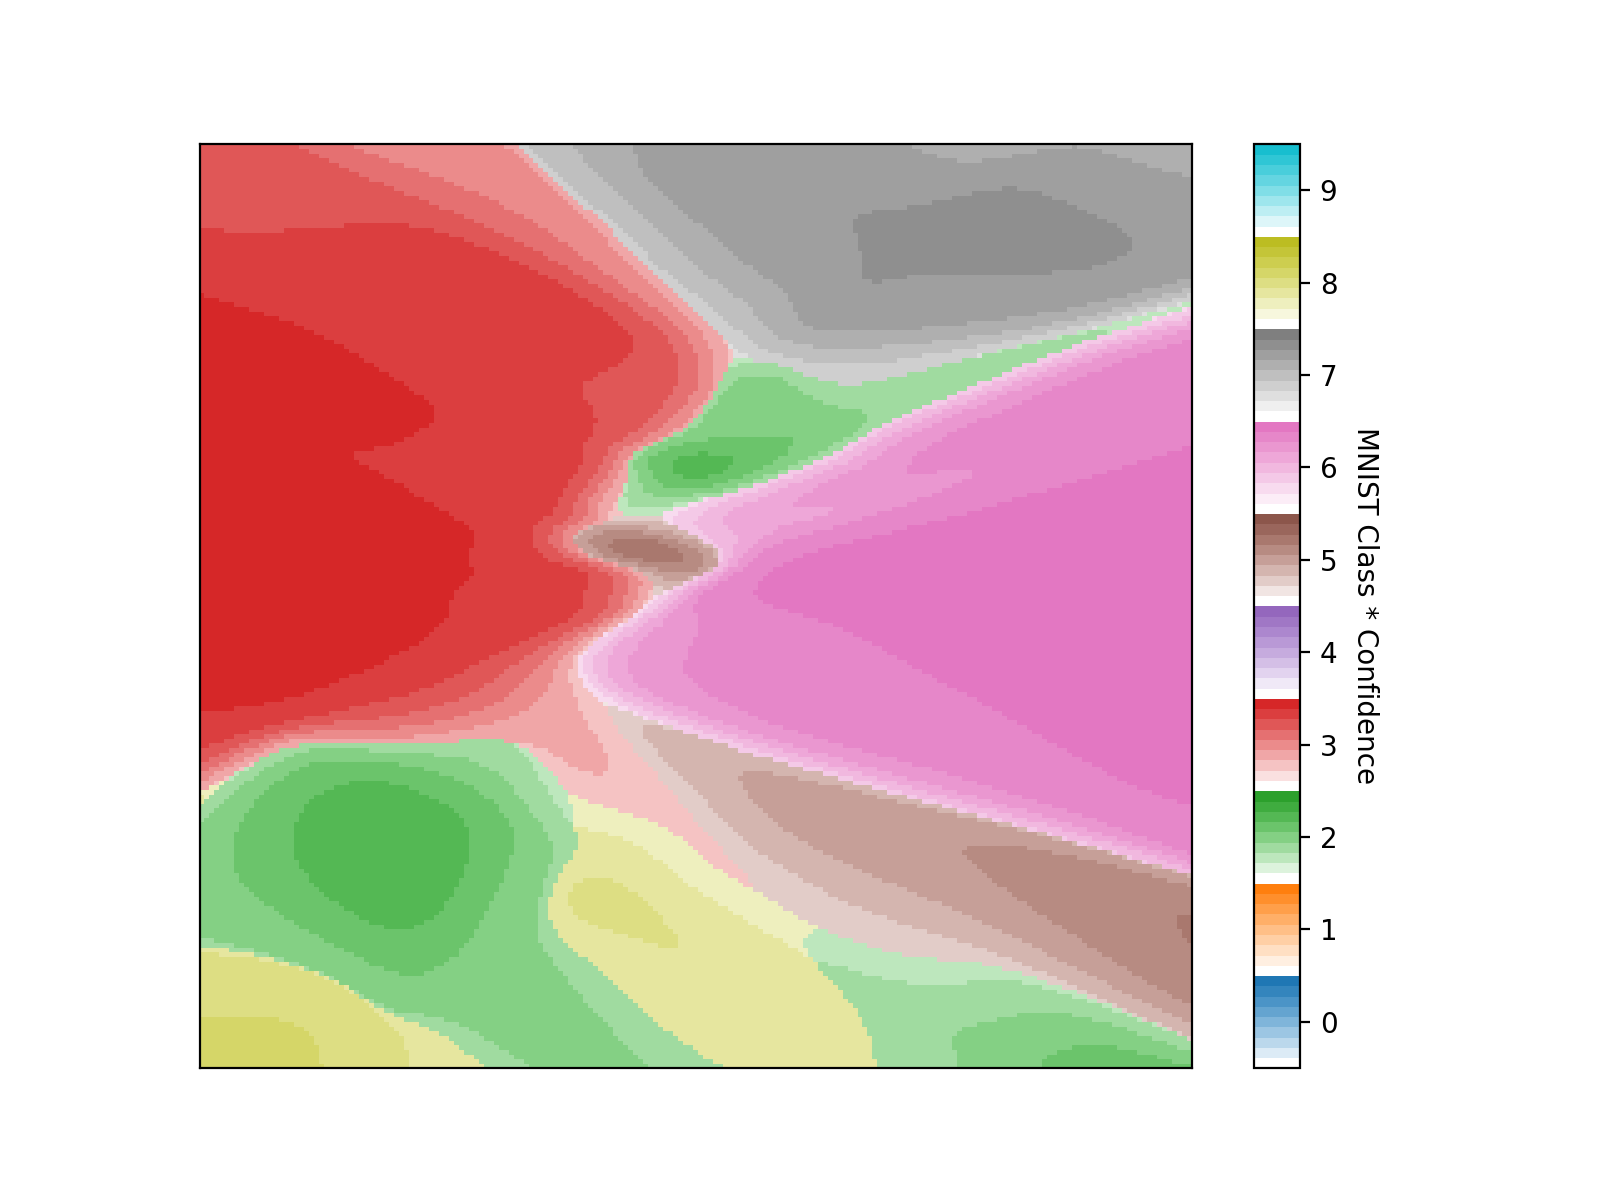

In [50]:
# plots a n_plot*nplot grid
fig, axes = plt.subplots(nrows=n_plots, ncols=n_plots)   

# plot using pcolormesh
if n_plots>1:
    pcm = axes[r,c].pcolormesh(Xs, Ys,
                         to_plot, 
                         cmap=c10, vmin=0, vmax=10, shading='auto')
    axes[r,c].xaxis.set_visible(False)
    axes[r,c].yaxis.set_visible(False)
else:
    # only one subplot
    pcm = axes.pcolormesh(Xs, Ys,
                         to_plot, 
                         cmap=c10, vmin=0, vmax=10, shading='auto')
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)

if n_plots>1:
    cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(), ticks=[x+0.5 for x in range(10)])
else:
    cbar = fig.colorbar(pcm, ax=axes, ticks=[x+0.5 for x in range(10)])

cbar.ax.set_yticklabels(range(10))

cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MNIST Class * Confidence', rotation=270)

# end 
plt.show()

<IPython.core.display.Javascript object>


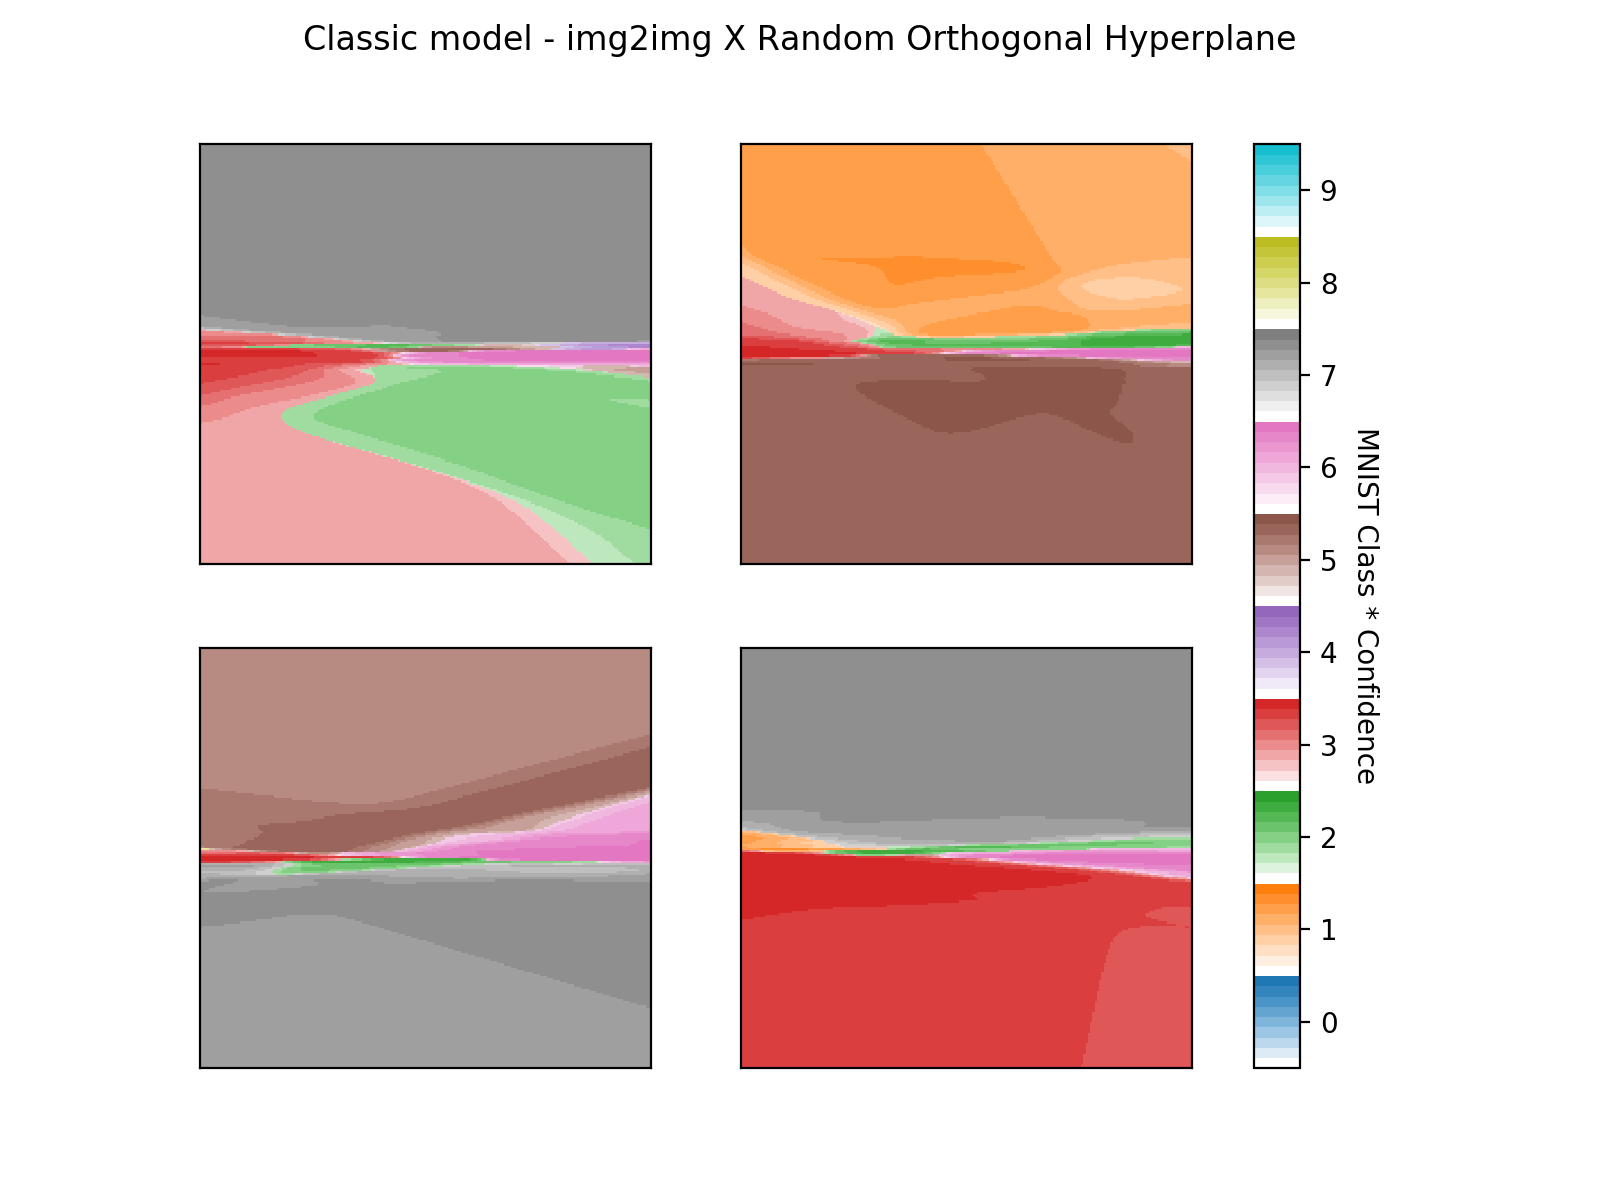

In [51]:
fgnh.plot_MNIST_hyperplanes(classic_model, img1, img2,
                            n_plots=2, grid_size=grid_size, mode='random',
                            title='Classic model - img2img X Random Orthogonal Hyperplane')